<a href="https://colab.research.google.com/github/patriciapuig0893/challenge_TelecomX_analisisevasionclientes/blob/main/Desafio_Telecom_X1_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio: Telecom X - Análisis de Evasión de Clientes

## 1.Extracción de datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
#Extraccion de datos de columnas con diccionarios

df_customer = pd.json_normalize(df['customer'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_phone = pd.json_normalize(df['phone'])

In [ ]:
df = pd.concat([df, df_customer, df_internet, df_account, df_phone], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   object 
 9   Dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  InternetService   7267 non-null   object 
 12  OnlineSecurity    7267 non-null   object 
 13  OnlineBackup      7267 non-null   object 
 14  DeviceProtection  7267 non-null   object 
 15  TechSupport       7267 non-null   object 
 16  StreamingTV       7267 non-null   object 


In [ ]:
datos_totales = df.drop(['customer', 'internet', 'account', 'phone'], axis=1)

In [ ]:
datos_totales.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,No


## 2.Transformación

### 2.1. Conocer el conjunto de Datos:

#### 2.1.1. Explorar las columnas del dataset y verificar sus tipos de datos.

In [ ]:
# Conociendo el conjunto de datos de cada columna

datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [ ]:
# Conociendo el tipo de datos de cada columna del DataSet

datos_totales.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
InternetService,object
OnlineSecurity,object
OnlineBackup,object


#### 2.1.2. Consultar el diccionario para comprender mejor el significado de las variables.

Diccionario de datos
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

Las columnas más importantes a considerar son:
* Churn
* tenure
* PhoneService
* MultipleLines
* InternetSecurity
* Contract
* Charges.Monthly
* Charges.Total

Además se debe considerar todas las suscripciones adicionales en caso de que se requiera más adelante

### 2.2. Comprobación de incoherencias en los datos

In [ ]:
# Verificar nulos

datos_totales.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# Verificar Valores duplicados

datos_totales.duplicated().sum()

np.int64(0)

In [ ]:
# Verificar valores ausentes

datos_totales.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
datos_ausentes = datos_totales['Charges.Total'].isna()
datos_totales[datos_ausentes]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines


In [ ]:
datos_totales = datos_totales.dropna(subset=['Charges.Total'])

In [ ]:
datos_totales

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.9,Yes,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,Yes,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,Yes,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,Yes,No


In [ ]:
# Verificar formato de columna float

datos_totales['Charges.Total'] = datos_totales['Charges.Total'].str.replace(' ','').replace('$', '').replace(',', '').replace('', None).astype(float)

In [ ]:
datos_totales['Charges.Total'].dtype

dtype('float64')

In [ ]:
datos_totales['customerID'].isnull().sum()

np.int64(0)

In [ ]:
datos_totales['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
datos_totales = datos_totales[datos_totales['Churn'] != '']

In [ ]:
datos_totales['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
datos_totales

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,Yes,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,Yes,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,Yes,No


In [ ]:
datos_totales['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
datos_totales.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No


In [ ]:
datos_totales['Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

### 2.3. Columna de cuentas diarias

In [ ]:
datos_totales['Charges.Daily'] = datos_totales['Charges.Monthly'] / 30

<ipython-input-27-3318573307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_totales['Charges.Daily'] = datos_totales['Charges.Monthly'] / 30


In [ ]:
#Verficiar si se hizo la insercion correctamente de la nueva columna

datos_totales.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,Yes,No,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No,2.796667


In [ ]:
datos_totales.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'Charges.Daily'],
      dtype='object')

In [ ]:
datos_totales['TechSupport'].isnull().sum()

np.int64(0)

### 2.4 Estandarización y transformación de datos (Extra)

In [ ]:
# Convirtiendo valores de columnas que sean Object 'Yes' o 'No' en valores binarios 1 y 0

columnas_binarias = [
    'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PhoneService', 'MultipleLines'
]

datos_totales[columnas_binarias] = datos_totales[columnas_binarias].replace({'Yes': 1, 'No': 0})

<ipython-input-31-1219335268>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_totales[columnas_binarias] = datos_totales[columnas_binarias].replace({'Yes': 1, 'No': 0})
<ipython-input-31-1219335268>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_totales[columnas_binarias] = datos_totales[columnas_binarias].replace({'Yes': 1, 'No': 0})


In [ ]:
datos_totales.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,0,2.796667


In [ ]:
# Verificar todas las columnas para hacer los cambios de nombres respectivos
# y hacer más amena la lectura y analisis de datos

columnas = []
columnas = datos_totales.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'Charges.Daily'],
      dtype='object')

In [ ]:
# Diccionario con los nombres en español, en minúsculas y separados con guión bajo

nombres_columnas_es = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'meses_contrato',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'respaldo_en_linea',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'multiples_lineas',
    'Charges.Daily': 'cargo_diario'
}

# Renombrar columnas en el DataFrame
datos_totales = datos_totales.rename(columns=nombres_columnas_es)

# Verificación de cambios hechos

datos_totales.head()

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,cargo_diario
0,0002-ORFBO,0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,0,2.796667


In [ ]:
datos_totales['metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
# Cambiar el contenido de las columnas con valores object para traducirlas al
# español

datos_totales['genero'] = datos_totales['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
datos_totales['servicio_internet'] = datos_totales['servicio_internet'].replace({'Fiber optic': 'Fibra Óptica', 'DSL': 'DSL', 'No': 'No'})
datos_totales['tipo_contrato'] = datos_totales['tipo_contrato'].replace({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Doble Anual'})
datos_totales['metodo_pago'] = datos_totales['metodo_pago'].replace({'Electronic check': 'Cheque Electrónico', 'Mailed check': 'Cheque Postal', 'Bank transfer (automatic)': 'Transferencia Bancaria Automática', 'Credit card (automatic)': 'Tarjeta de Crédito Automática'})

In [ ]:
# Verificar que cambios y traducciones se hayan hecho correctamente

datos_totales.head(15)

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,cargo_diario
0,0002-ORFBO,0,Femenino,0,1,1,9,DSL,0,1,...,1,0,Anual,1,Cheque Postal,65.60,593.30,1,0,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,DSL,0,0,...,0,1,Mensual,0,Cheque Postal,59.90,542.40,1,1,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,Fibra Óptica,0,0,...,0,0,Mensual,1,Cheque Electrónico,73.90,280.85,1,0,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,Fibra Óptica,0,1,...,1,1,Mensual,1,Cheque Electrónico,98.00,1237.85,1,0,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,Fibra Óptica,0,0,...,1,0,Mensual,1,Cheque Postal,83.90,267.40,1,0,2.796667
5,0013-MHZWF,0,Femenino,0,0,1,9,DSL,0,0,...,1,1,Mensual,1,Tarjeta de Crédito Automática,69.40,571.45,1,0,2.313333
6,0013-SMEOE,0,Femenino,1,1,0,71,Fibra Óptica,1,1,...,1,1,Doble Anual,1,Transferencia Bancaria Automática,109.70,7904.25,1,0,3.656667
7,0014-BMAQU,0,Masculino,0,1,0,63,Fibra Óptica,1,0,...,0,0,Doble Anual,1,Tarjeta de Crédito Automática,84.65,5377.80,1,1,2.821667
8,0015-UOCOJ,0,Femenino,1,0,0,7,DSL,1,0,...,0,0,Mensual,1,Cheque Electrónico,48.20,340.35,1,0,1.606667
9,0016-QLJIS,0,Femenino,0,1,1,65,DSL,1,1,...,1,1,Doble Anual,1,Cheque Postal,90.45,5957.90,1,1,3.015000


## 3.Carga y Análisis (L - Load & Analysis)

### 3.1. Análisis Descriptivo

In [ ]:
datos_totales.describe()

,churn,adulto_mayor,pareja,dependientes,meses_contrato,factura_electronica,cargo_mensual,cargo_total,servicio_telefonico,cargo_diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2283.300441,0.903166,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.771362,0.295752,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,401.450000,1.000000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,1.000000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3794.737500,1.000000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,3.958333


### 3.2. Distribución de evasión

<ipython-input-39-16414790>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x='churn', data=datos_totales, palette=['#66bb6a', '#ef5350'])


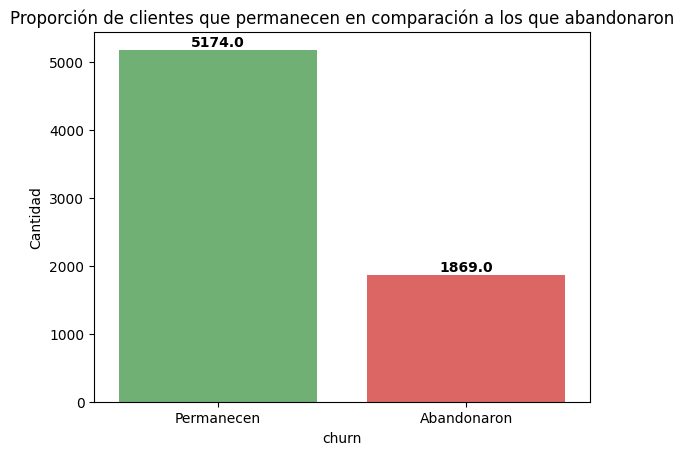

In [ ]:
# Visualización de la proporción de clientes segun la columna Churn usando gráfico de barras

import matplotlib.pyplot as plt
import seaborn as sns

ax =sns.countplot(x='churn', data=datos_totales, palette=['#66bb6a', '#ef5350'])
plt.title('Proporción de clientes que permanecen en comparación a los que abandonaron')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Permanecen', 'Abandonaron'])

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

### 3.3. Recuento de evasión por variables categóricas

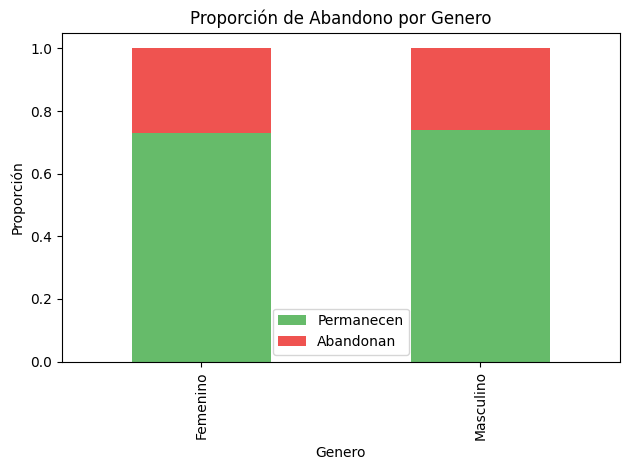

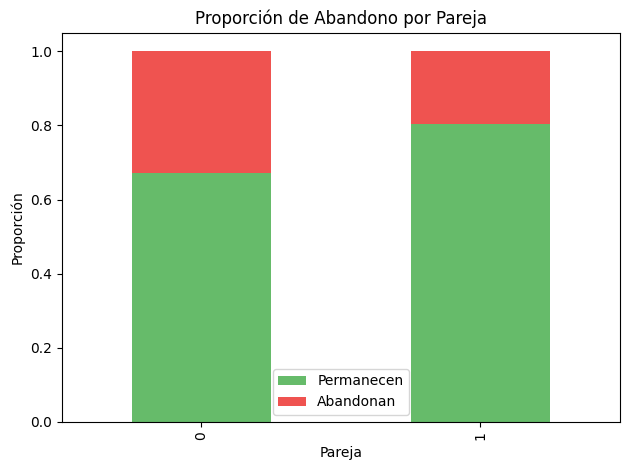

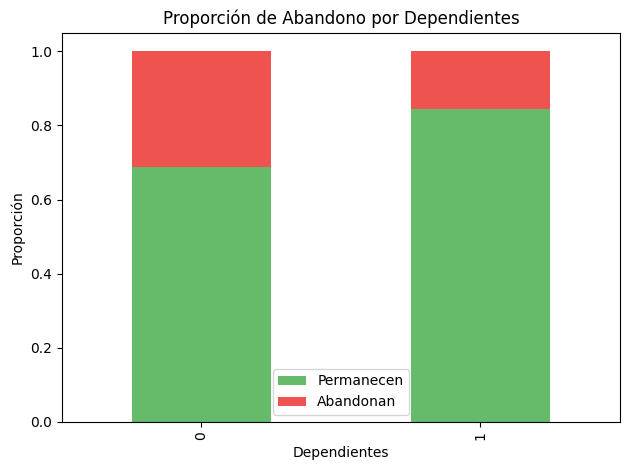

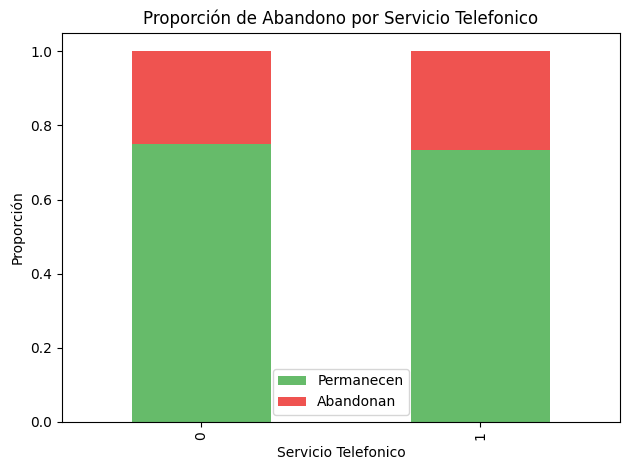

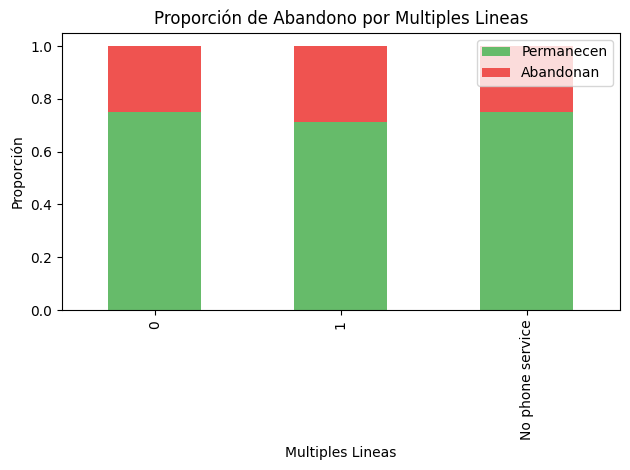

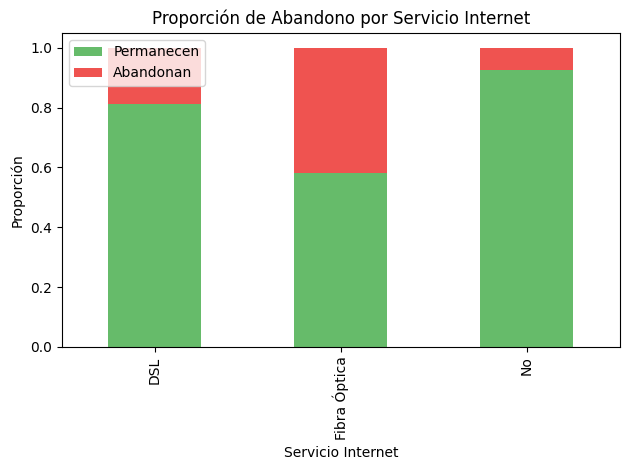

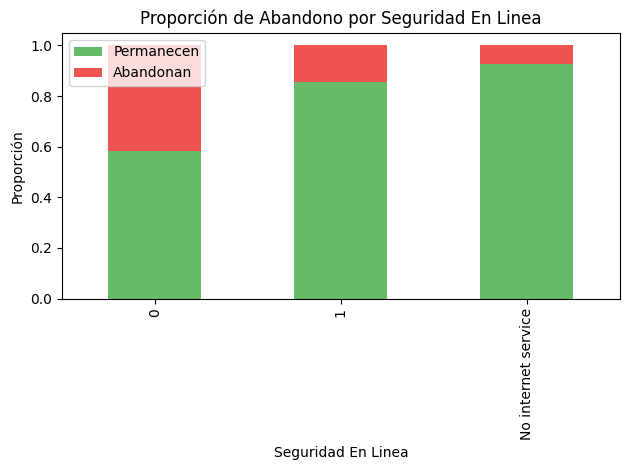

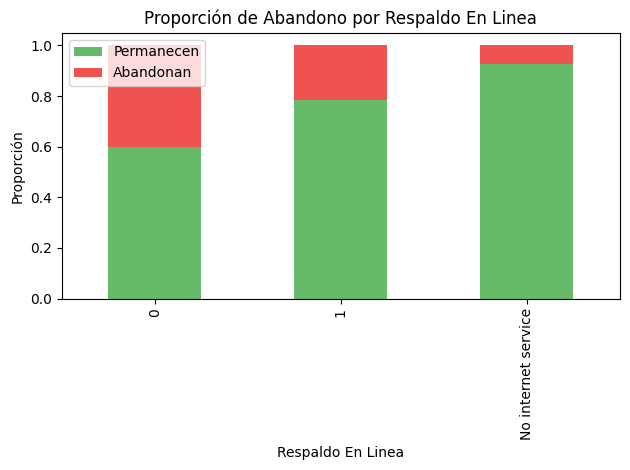

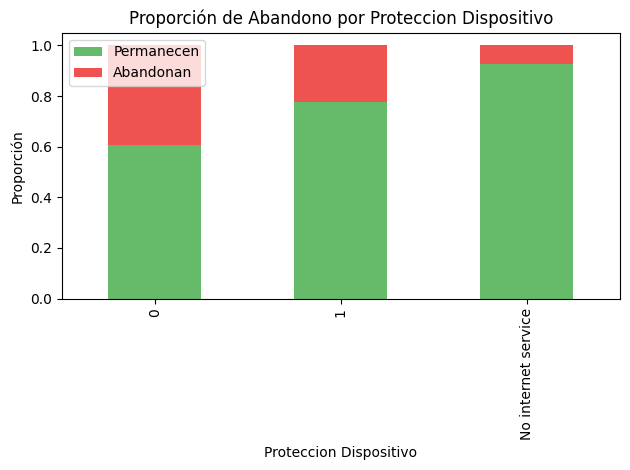

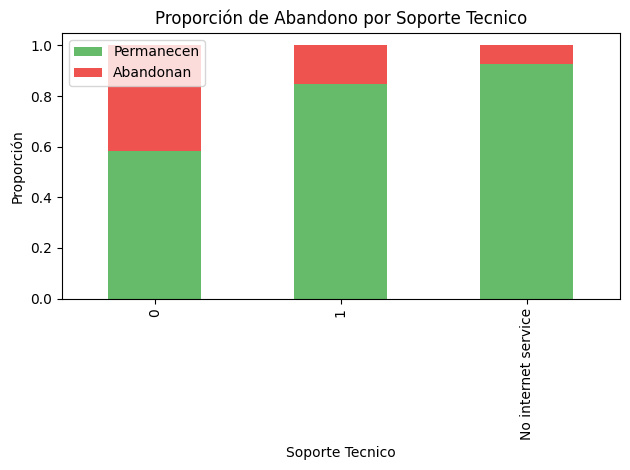

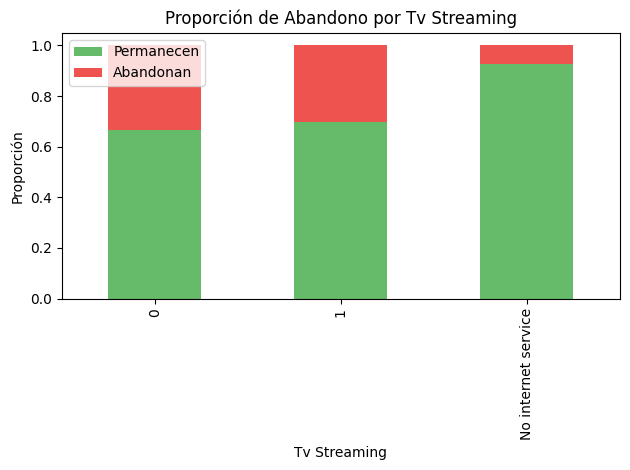

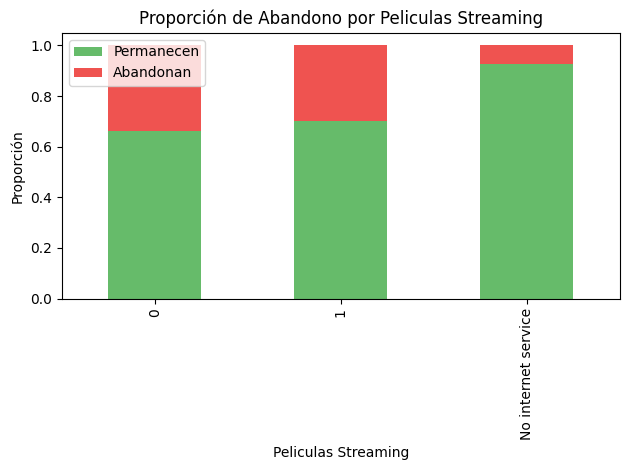

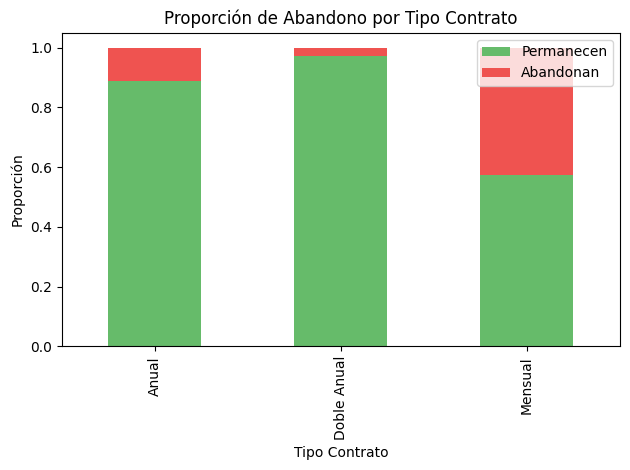

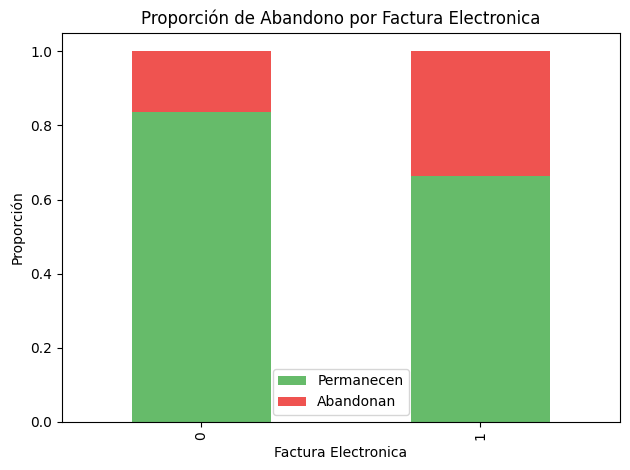

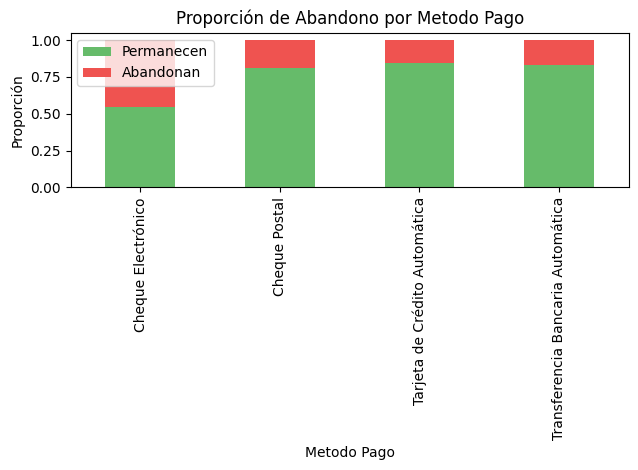

In [ ]:
variables_categoricas = [
    'genero', 'pareja', 'dependientes', 'servicio_telefonico',
    'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
    'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
    'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
    'factura_electronica', 'metodo_pago'
]

for col in variables_categoricas:
    datos_totales.groupby(col)['churn'].value_counts(normalize=True).unstack().plot(
        kind='bar', stacked=True, color=['#66bb6a', '#ef5350']
    )
    plt.title(f'Proporción de Abandono por {col.replace("_", " ").title()}')
    plt.ylabel('Proporción')
    plt.xlabel(col.replace("_", " ").title())
    plt.legend(['Permanecen', 'Abandonan'])
    plt.tight_layout()
    plt.show()

### 3.4. Conteo de evasión de variables numéricas

In [ ]:
# Listar columnas numéricas

numericas = ['meses_contrato', 'cargo_mensual', 'cargo_total', 'cargo_diario']

<ipython-input-42-3005551360>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})


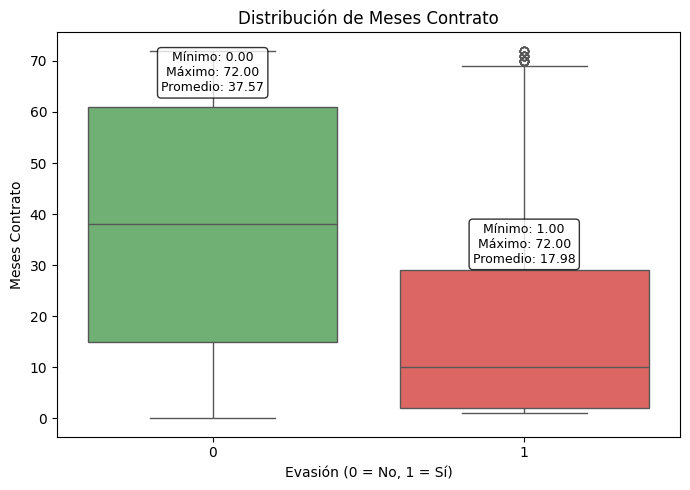

<ipython-input-42-3005551360>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})


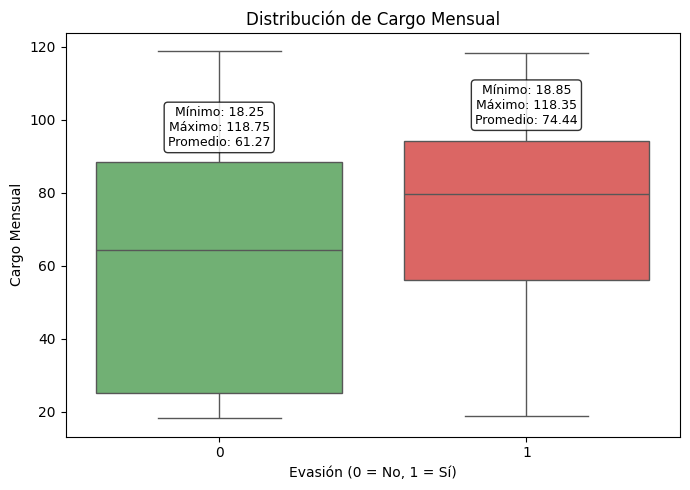

<ipython-input-42-3005551360>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})


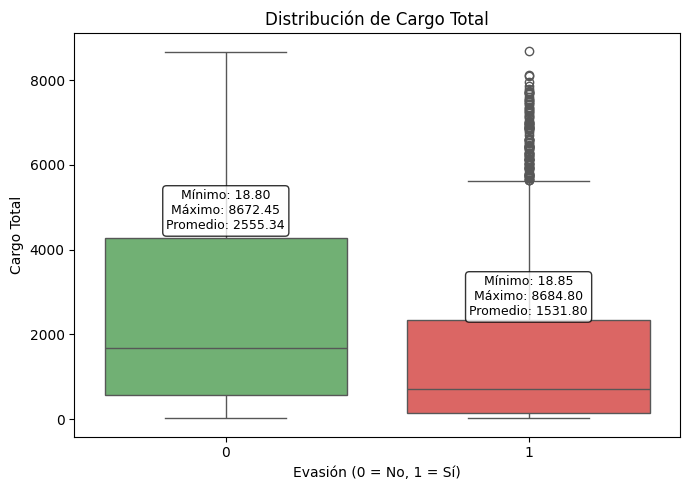

<ipython-input-42-3005551360>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='churn', y=col, data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})


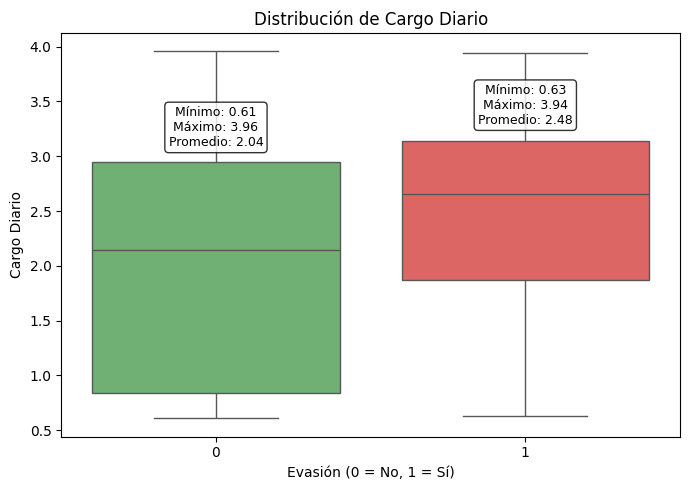

In [ ]:
# Explorando la evasión a traves de un bloxplots
import matplotlib.pyplot as plt
import seaborn as sns

for col in numericas:
    plt.figure(figsize=(7, 5))
    ax = sns.boxplot(x='churn', y=col, data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})
    plt.title(f'Distribución de {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title())
    plt.xlabel('Evasión (0 = No, 1 = Sí)')

    # Agregar etiquetas para mejor claridad

    for grupo in datos_totales['churn'].unique():
        datos = datos_totales[datos_totales['churn'] == grupo][col].dropna()
        minimo = datos.min()
        maximo = datos.max()
        promedio = datos.mean()
        q3 = datos.quantile(0.75)

        # Posición de texto sobre la caja

        x_pos = grupo
        y_pos = q3 + (q3 * 0.05)

        etiqueta = (
            f'Mínimo: {minimo:.2f}\n'
            f'Máximo: {maximo:.2f}\n'
            f'Promedio: {promedio:.2f}'
        )

        ax.text(x = x_pos, y = y_pos, s = etiqueta, ha = 'center', fontsize = 9,
                bbox=dict(facecolor='white', alpha = 0.8, boxstyle='round'))

    plt.tight_layout()
    plt.show()

## 4.Tarea Extra

### 4.1. Análisis de correlación entre variables

In [ ]:
# Relación entre la cuenta diaria y la evasión

correlacion = datos_totales['churn'].corr(datos_totales['cargo_diario'])
print(f'La correlación entre la cuenta diaria y la evasión es: {correlacion}')

La correlación entre la cuenta diaria y la evasión es: 0.19335642223784713


<ipython-input-44-4197625830>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cargo_diario', data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})


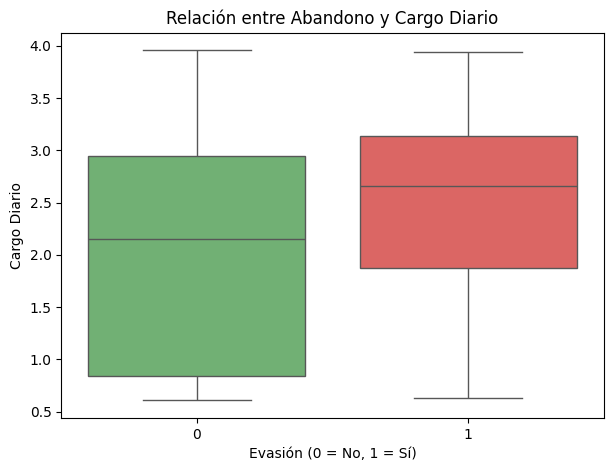

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='churn', y='cargo_diario', data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})
plt.title('Relación entre Abandono y Cargo Diario')
plt.ylabel('Cargo Diario')
plt.xlabel('Evasión (0 = No, 1 = Sí)')

plt.show()

In [ ]:
datos_totales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   churn                   7043 non-null   int64  
 2   genero                  7043 non-null   object 
 3   adulto_mayor            7043 non-null   int64  
 4   pareja                  7043 non-null   int64  
 5   dependientes            7043 non-null   int64  
 6   meses_contrato          7043 non-null   int64  
 7   servicio_internet       7043 non-null   object 
 8   seguridad_en_linea      7043 non-null   object 
 9   respaldo_en_linea       7043 non-null   object 
 10  proteccion_dispositivo  7043 non-null   object 
 11  soporte_tecnico         7043 non-null   object 
 12  tv_streaming            7043 non-null   object 
 13  peliculas_streaming     7043 non-null   object 
 14  tipo_contrato           7043 non-null   objec

In [ ]:
numericas = [
    'churn',  # churn
    'meses_contrato',
    'cargo_mensual',
    'cargo_total',
    'cargo_diario',
    'adulto_mayor',        # binaria (0 = no es adulto mayor, 1 = sí)
    'pareja',              # si está codificada como 0 y 1
    'dependientes',        # 0 y 1
    # ...y cualquier otra variable transformada a 0 y 1
]

In [ ]:
correlaciones = datos_totales[numericas].corr()
print(correlaciones['churn'].sort_values(ascending=False))

churn             1.000000
cargo_mensual     0.193356
cargo_diario      0.193356
adulto_mayor      0.150889
pareja           -0.150448
dependientes     -0.164221
cargo_total      -0.199484
meses_contrato   -0.352229
Name: churn, dtype: float64


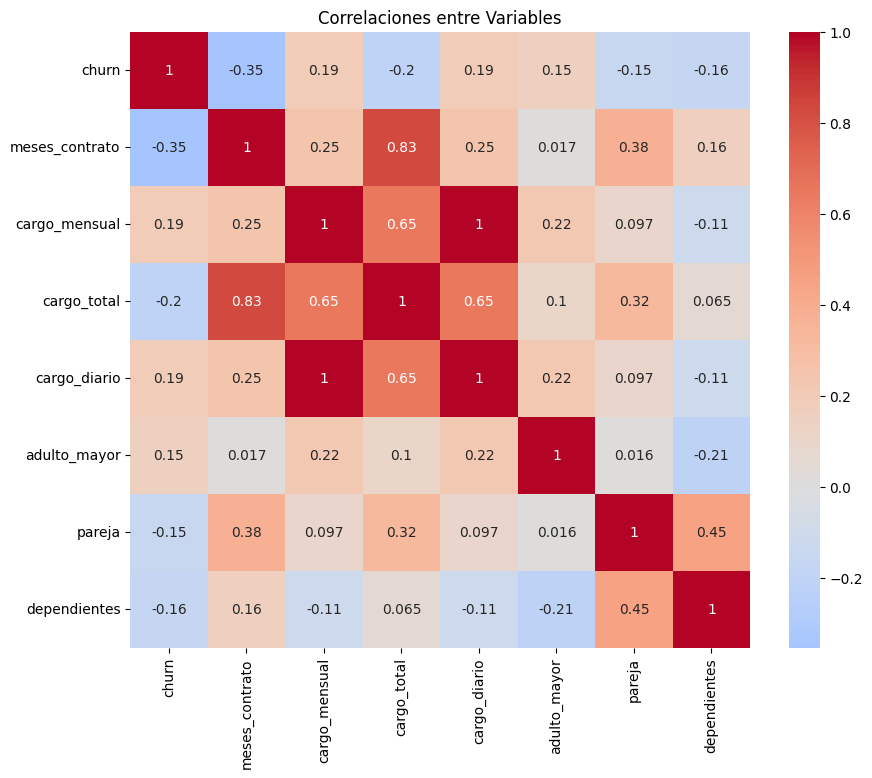

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones entre Variables')
plt.show()

<ipython-input-49-1428947262>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='meses_contrato', data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})


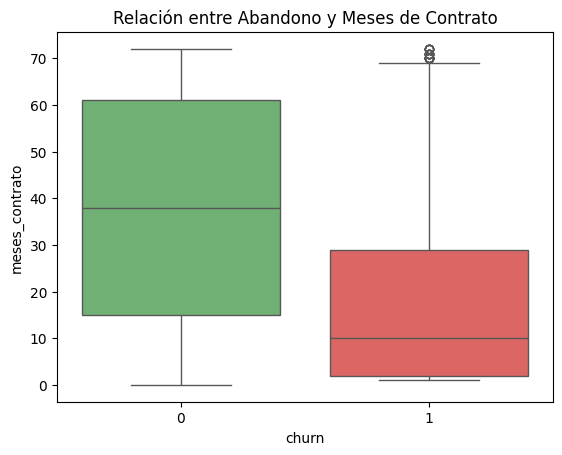

In [ ]:
sns.boxplot(x='churn', y='meses_contrato', data=datos_totales, palette={'0':'#66bb6a', '1':'#ef5350'})
plt.title('Relación entre Abandono y Meses de Contrato')

plt.show()

## 5.Informe final

### 5.1. Introducción

El presente informe se enmarca en el proyecto "Churn de Clientes" de Telecom X,
una empresa que actualmente enfrenta una preocupante tasa de cancelaciones por parte de sus clientes. El objetivo principal de este análisis es comprender los factores que influyen en la evasión, con el fin de aportar información estratégica que permita diseñar acciones concretas para mejorar la retención de clientes.
Como asistente en el área de análisis de datos, tu labor ha sido fundamental en la importación, tratamiento y exploración de los datos mediante el uso de Python y bibliotecas como Pandas, Matplotlib y Seaborn. El proyecto se desarrolló siguiendo principios de un proceso ETL (Extracción, Transformación y Carga) para garantizar datos limpios y estructurados.
A través de un Análisis Exploratorio de Datos (EDA) se identificaron patrones, correlaciones y posibles indicadores de riesgo de abandono. Este informe presenta los hallazgos clave del análisis, que servirán de base para la futura implementación de modelos predictivos de churn.

### 5.2. Limpieza y Tratamiento de Datos

El primer paso fue asegurar la calidad de los datos antes de analizarlos. Para ello, se realizó una limpieza exhaustiva de los datos brutos disponibles en formato JSON. Esta etapa incluyó:

- **Eliminación de valores nulos:** se identificaron columnas con datos ausentes, especialmente en `cargo_total`, y se eliminaron filas incompletas para mantener la consistencia del análisis. Ver celda de tratamiento de nulos.
- **Conversión de tipos de datos:** muchas columnas con valores binarios (`Yes/No`) estaban en formato `object`. Estas fueron transformadas a `int64` para permitir cálculos y visualizaciones. Esto incluyó variables como `pareja`, `servicio_telefonico`, `factura_electronica`, entre otras.
- **Normalización de nombres de columnas:** se renombraron todas las columnas a español con formato estandarizado (minúsculas, guión bajo), lo cual facilitó la interpretación y manejo del DataFrame.
- **Creación de nuevas variables:** se generaron columnas como `cargo_diario`, derivada del `cargo_mensual`, y `cantidad_servicios`, que suma el total de servicios contratados por cliente. Estas variables se diseñaron para ofrecer mejores perspectivas analíticas.

Esta etapa fue clave para estructurar correctamente el dataset y preparar las variables relevantes para el análisis posterior.


### 5.3. Análisis Exploratorio de Datos

Una vez preparados los datos, se realizó un análisis exploratorio para comprender los factores relacionados con la evasión de clientes (`churn`). A través de visualizaciones y métricas estadísticas, se observaron los siguientes patrones clave:

- **Distribución de evasión:** mediante un gráfico de barras, se visualizó que aproximadamente un cuarto de los clientes abandonan el servicio, lo que representa una tasa importante de churn.
- **Relación con variables categóricas:** se analizaron variables como tipo de contrato, servicios adicionales, forma de pago y presencia de dependientes. Se utilizaron gráficos apilados para observar cómo varía la evasión dentro de cada categoría.
- **Relación con variables numéricas:** se emplearon boxplots y correlaciones para analizar el vínculo entre el churn y variables como `meses_contrato`, `cargo_mensual`, `cargo_total` y `cantidad_servicios`. Se observó que los clientes con contratos más largos y mayor número de servicios contratados tienden a permanecer, mientras que quienes pagan más mensualmente o tienen pocos servicios presentan mayor propensión a abandonar.
- **Análisis de correlaciones:** se construyó una matriz de calor para observar la fuerza de la relación entre variables. `meses_contrato` tuvo la correlación más fuerte y negativa con `churn`, indicando que clientes con más tiempo suelen quedarse.

Estas observaciones permiten generar hipótesis y comprender el perfil del cliente propenso a abandonar, lo cual es esencial para diseñar estrategias de retención.

### 5.4 Conclusiones e Insights

El análisis permitió extraer varias conclusiones importantes respecto al comportamiento de los clientes de Telecom X:

1. **Tiempo con la empresa:** los clientes con mayor antigüedad (`meses_contrato`) muestran una clara tendencia a permanecer, lo que sugiere que las estrategias de fidelización temprana podrían ser efectivas para reducir el churn.
2. **Carga económica:** un `cargo_mensual` más elevado está levemente asociado con mayor evasión. Esto puede deberse a la percepción de alto costo, lo que indica la necesidad de revisar precios o mejorar el valor percibido.
3. **Compromiso con el servicio:** los usuarios que contratan más servicios (`cantidad_servicios`) abandonan menos, lo que sugiere que promover paquetes integrados puede aumentar la retención.
4. **Factores personales:** los clientes con pareja o dependientes tienen menor tendencia al abandono, lo cual puede indicar un uso más compartido y necesidad de continuidad del servicio.


### 5.5. Recomendaciones

**Siguientes pasos recomendados:**

- Construir un modelo predictivo de churn usando las variables más influyentes identificadas.
- Diseñar campañas dirigidas a clientes con riesgo de evasión, como los que tienen pocos servicios o contratos mensuales.
- Explorar mejoras en el onboarding de nuevos clientes para convertirlos en usuarios de largo plazo.

Este análisis constituye una base sólida para avanzar en estrategias más sofisticadas basadas en datos, orientadas a mejorar la fidelización y reducir la pérdida de clientes en Telecom X.
¿Te gustaría que prepare también una celda final con resumen automático de correlaciones clave o una tabla